# Implementation of Logistic Regression using Gradient Descent

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generating some random data for the logistic model to fit.

In [2]:
labels = np.random.randint(low=0, high=2, size=(100))
x_1 = np.array([np.random.uniform(label*5, 2+label*5) for label in labels])
x_2 = np.array([np.random.uniform(label*3, 2+label*3) for label in labels])
features = np.array([np.ones(shape=(100)), x_1, x_2])

Defining the hypothesis function $h(x)={1}/({1+e^{-\theta*x}})$

In [3]:
def hypothesis(features, parameters):
    return 1/(1+np.exp(-parameters.dot(features)))

Initializing the parameters to be estimated with random numbers.

In [6]:
parameters = np.random.uniform(0.0, 1.0, (3))

In [7]:
parameters

array([0.32221569, 0.32198888, 0.75876974])

Plotting the data.

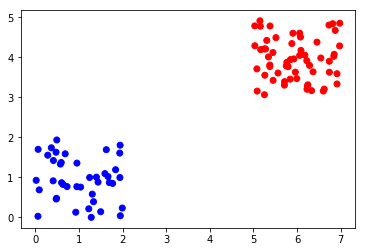

In [8]:
predictions = hypothesis(features, parameters)
mapping = {0: "blue", 1:"red"}
plt.scatter(x_1, x_2, c=[mapping[label] for label in labels])
plt.show()

Converting the predicted odds to labels. The plotting the data again with the predicted labels.

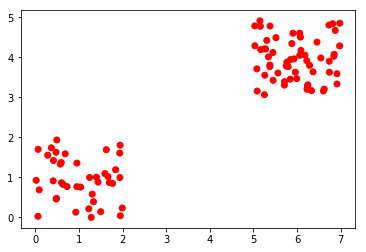

In [9]:
predicted_labels = predictions
predicted_labels[predictions >= 0.5] = 1
predicted_labels[predictions < 0.5] = 0

plt.scatter(x_1, x_2, c=[mapping[label] for label in predicted_labels])
plt.show()

Defining the loss function, calculating; $-y\log{(h(x))}-((1-y)\log{(1-h(x))})$. h() beeing the hypothesis.

In [10]:
def loss(features, true_labels, parameters):
    predictions = hypothesis(features, parameters)
    loss = -true_labels.dot(np.log(predictions))-(1-true_labels).dot(np.log(1-predictions))
    return loss

Defining the function for gradient calculation.

In [11]:
def gradients(features, true_labels, parameters):
    number_of_samples = features.shape[1]
    predictions = hypothesis(features, parameters)
    gradients = features.dot(predictions - true_labels)*(1/number_of_samples)
    return gradients

Running the gradient descent algorithm.

In [12]:
lr = 1.0
epochs = 50

for i in range(epochs):
    parameters = parameters - lr * gradients(features, labels, parameters)
    print(loss(features, labels, parameters))

47.68056839007264
44.87431681673862
41.114589543050364
43.505942827257115
31.85784552201997
29.66479085888666
27.375303425260547
25.823601136612492
23.618056983516293
22.23180646120001
20.602899207325006
19.408669717750115
18.27062111689497
17.30900919873449
16.44176676087732
15.664124213261385
14.956837830704774
14.310005454322788
13.71570409972374
13.167776407670093
12.661082725434733
12.191228359182082
11.75441412988176
11.347337052111907
10.967112820446328
10.611212659520435
10.27741104585936
9.963742239468623
9.668463959708765
9.390026901264214
9.12704904145865
8.878293896263715
8.642652044400155
8.41912536761566
8.206813557689525
8.00490252263531
7.812654390329247
7.629398860786562
7.4545257011886905
7.287478212599603
7.127747525720203
6.974867606289887
6.828410869859772
6.6879843214290915
6.553226148488592
6.423802706857003
6.299405847734622
6.179750541956086
6.0645727637659
5.953627601777159


Visualizing the results, plotting the predicted labels for the dataset.

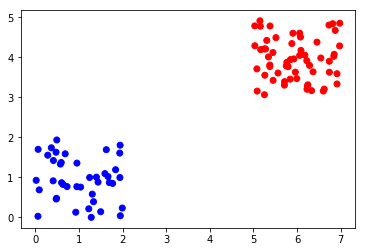

In [14]:
predictions = hypothesis(features, parameters)
predicted_labels = predictions
predicted_labels[predictions >= 0.5] = 1
predicted_labels[predictions < 0.5] = 0

plt.scatter(x_1, x_2, c=[mapping[label] for label in predicted_labels])
plt.show()